In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

np.random.seed(17)
tf.random.set_seed(17)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
val_frac = 0.25

x_valid = x_train[round((1-val_frac) * len(x_train)):]
y_valid = y_train[round((1-val_frac) * len(y_train)):]

x_train = x_train[:round((1-val_frac) * len(x_train))]
y_train = y_train[:round((1-val_frac) * len(y_train))]

In [6]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(28*28, activation='relu'),
#     tf.keras.layers.Dense(300, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(300, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# model.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['accuracy']
# )

# model.summary()

dropout_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

for drp in dropout_range:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(28*28, activation='relu'),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drp),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drp),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=1024, epochs=50, callbacks=[stopping])
    plt.plot(history.history['val_accuracy'][2:])
    
plt.legend(dropout_range)
plt.show()

Epoch 1/50
44/44 [==============================] - 4s 71ms/step - loss: 0.5471 - accuracy: 0.8092 - val_loss: 0.6089 - val_accuracy: 0.7863
Epoch 2/50
44/44 [==============================] - 3s 67ms/step - loss: 0.3522 - accuracy: 0.8736 - val_loss: 0.4272 - val_accuracy: 0.8499
Epoch 3/50
 4/44 [=>............................] - ETA: 2s - loss: 0.3089 - accuracy: 0.8892

KeyboardInterrupt: 

In [7]:
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(28*28, activation='relu'),
        tf.keras.layers.BatchNormalization(),    
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])
check = tf.keras.callbacks.ModelCheckpoint(filepath='{epoch:02d}-{val_loss:.2f}.h5', save_weights_only=True)

history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=1024, epochs=50, callbacks=[stopping])

Epoch 1/50
44/44 [==============================] - 4s 78ms/step - loss: 0.7385 - accuracy: 0.7484 - val_loss: 0.9768 - val_accuracy: 0.7435
Epoch 2/50
44/44 [==============================] - 3s 75ms/step - loss: 0.4735 - accuracy: 0.8311 - val_loss: 0.4996 - val_accuracy: 0.8268
Epoch 3/50
44/44 [==============================] - 3s 77ms/step - loss: 0.4225 - accuracy: 0.8499 - val_loss: 0.3870 - val_accuracy: 0.8610
Epoch 4/50
44/44 [==============================] - 3s 78ms/step - loss: 0.3859 - accuracy: 0.8610 - val_loss: 0.3673 - val_accuracy: 0.8682
Epoch 5/50
44/44 [==============================] - 3s 75ms/step - loss: 0.3627 - accuracy: 0.8693 - val_loss: 0.3353 - val_accuracy: 0.8762
Epoch 6/50
44/44 [==============================] - 3s 78ms/step - loss: 0.3396 - accuracy: 0.8757 - val_loss: 0.3313 - val_accuracy: 0.8811
Epoch 7/50
44/44 [==============================] - 3s 76ms/step - loss: 0.3261 - accuracy: 0.8812 - val_loss: 0.3163 - val_accuracy: 0.8860
Epoch 8/50
44

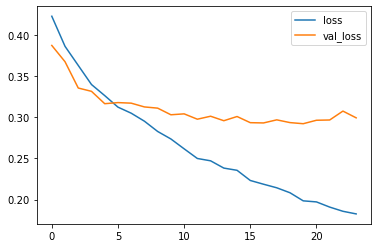

In [8]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.legend(['loss', 'val_loss'])
plt.show()

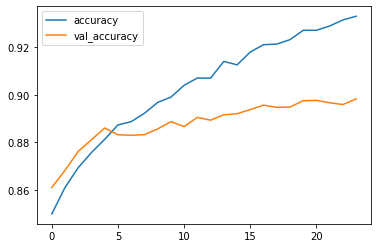

In [9]:
plt.plot(history.history['accuracy'][2:])
plt.plot(history.history['val_accuracy'][2:])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [11]:
print('test: ')
model.evaluate(x_test, y_test)

print('valid: ')
model.evaluate(x_valid, y_valid)

test: 
313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8930
valid: 
469/469 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.8982


[0.29915091395378113, 0.8981999754905701]